In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [ ]:
path="/content/drive/MyDrive/dileep.csv"
dileep=pd.read_csv(path)
dileep

,age,sex,chol,fbs,restecg,thalach,target
0,52,1,212,0,1,168,0
1,53,1,203,1,0,155,0
2,70,1,174,0,1,125,0
3,61,1,203,0,1,161,0
4,62,0,294,1,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,221,0,1,164,1
1021,60,1,258,0,0,141,0
1022,47,1,275,0,0,118,0
1023,50,0,254,0,0,159,1


In [ ]:
info = ["age","1: male, 0: female"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved"]



for i in range(len(info)):
    print(dileep.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved


In [ ]:
dileep['target']t

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
dileep.groupby('target').size()

target
0    499
1    526
dtype: int64

In [ ]:
dileep.groupby('target').sum()

,age,sex,chol,fbs,restecg,thalach
target,,,,,,
0,28228,413,125395,82,228,69426
1,27567,300,126755,71,315,83416


In [ ]:
dileep.shape

(1025, 7)

In [ ]:
dileep.size

7175

In [ ]:
dileep.describe()

,age,sex,chol,fbs,restecg,thalach,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,246.00000,0.149268,0.529756,149.114146,0.513171
std,9.072290,0.460373,51.59251,0.356527,0.527878,23.005724,0.500070
min,29.000000,0.000000,126.00000,0.000000,0.000000,71.000000,0.000000
25%,48.000000,0.000000,211.00000,0.000000,0.000000,132.000000,0.000000
50%,56.000000,1.000000,240.00000,0.000000,1.000000,152.000000,1.000000
75%,61.000000,1.000000,275.00000,0.000000,1.000000,166.000000,1.000000
max,77.000000,1.000000,564.00000,1.000000,2.000000,202.000000,1.000000


In [ ]:
dileep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      1025 non-null   int64
 1   sex      1025 non-null   int64
 2   chol     1025 non-null   int64
 3   fbs      1025 non-null   int64
 4   restecg  1025 non-null   int64
 5   thalach  1025 non-null   int64
 6   target   1025 non-null   int64
dtypes: int64(7)
memory usage: 56.2 KB


In [ ]:
dileep['target'].unique()

array([0, 1])

In [ ]:
#Visualization

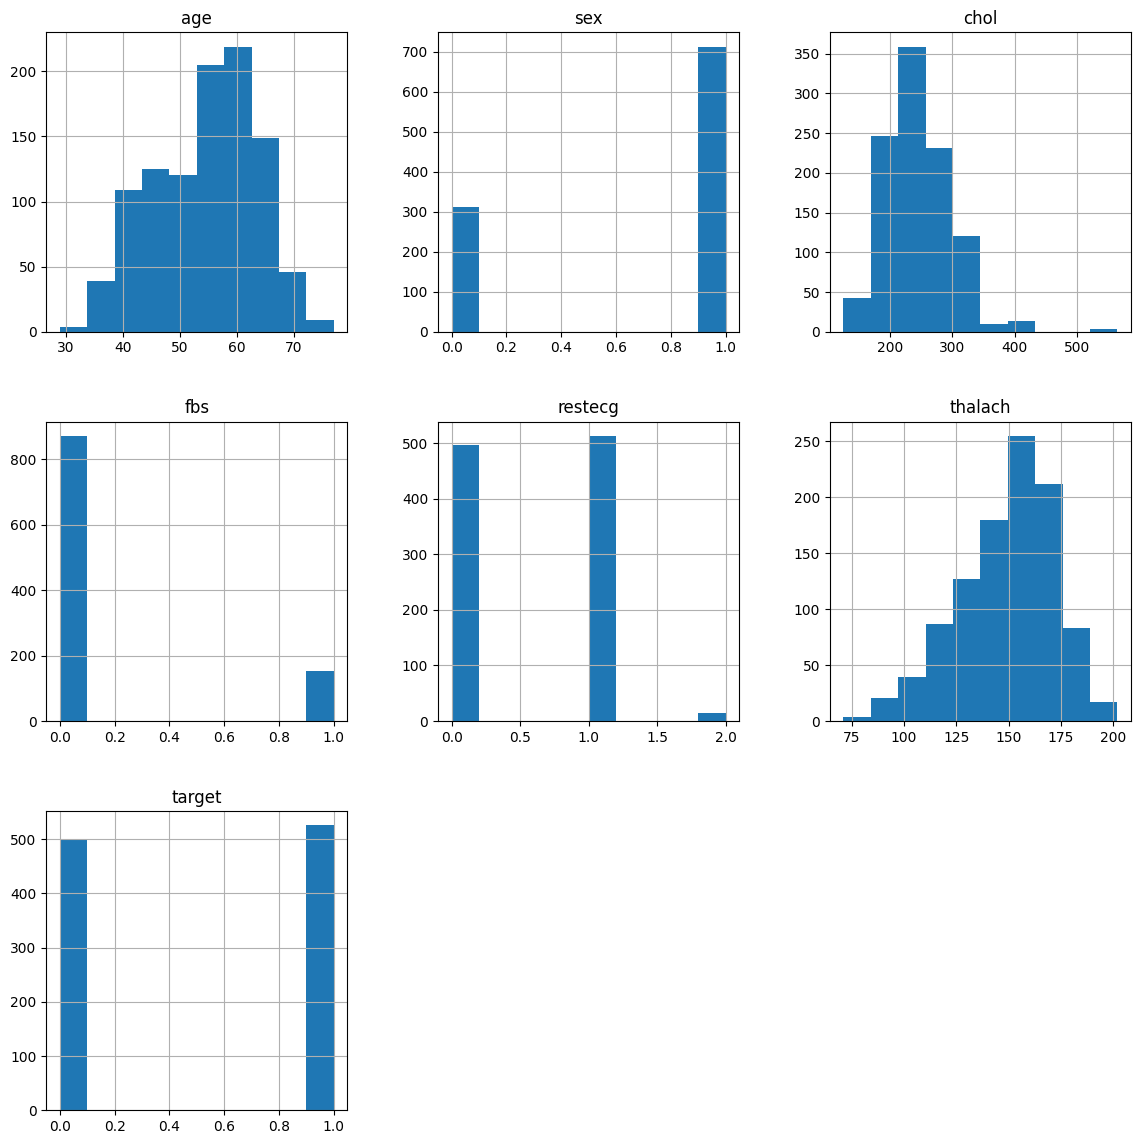

In [ ]:
dileep.hist(figsize=(14,14))
plt.show()

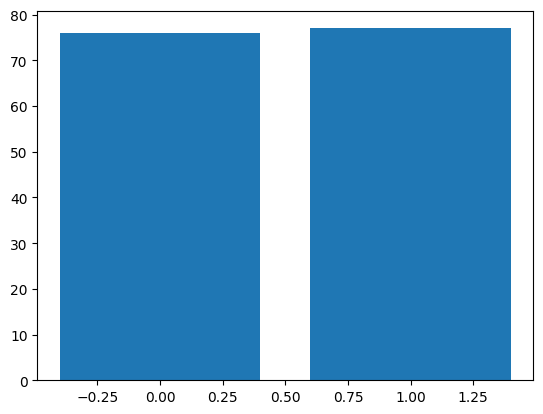

In [ ]:
plt.bar(x=dileep['sex'],height=dileep['age'])
plt.show()

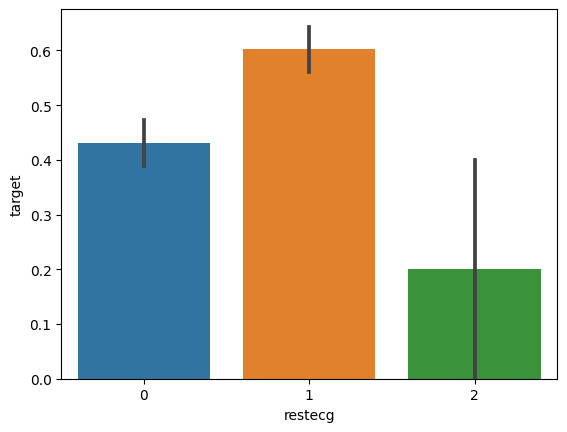

In [ ]:
sns.barplot(x="restecg", y="target", data=dileep)
plt.show()

<Axes: xlabel='sex', ylabel='age'>

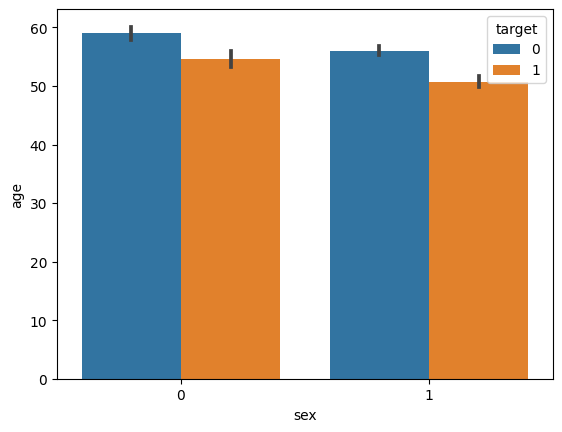

In [ ]:
sns.barplot(x=dileep['sex'],y=dileep['age'],hue=dileep['target'])

In [ ]:
px.bar(dileep,dileep['sex'],dileep['target'])

<ipython-input-25-ca07d4197dbf>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='chol', ylabel='Density'>

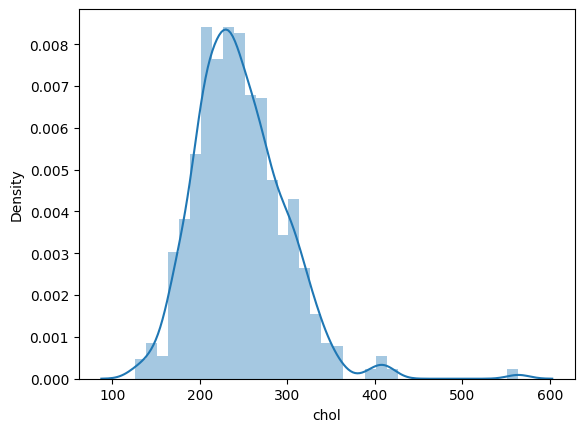

In [ ]:
sns.distplot(dileep["chol"])

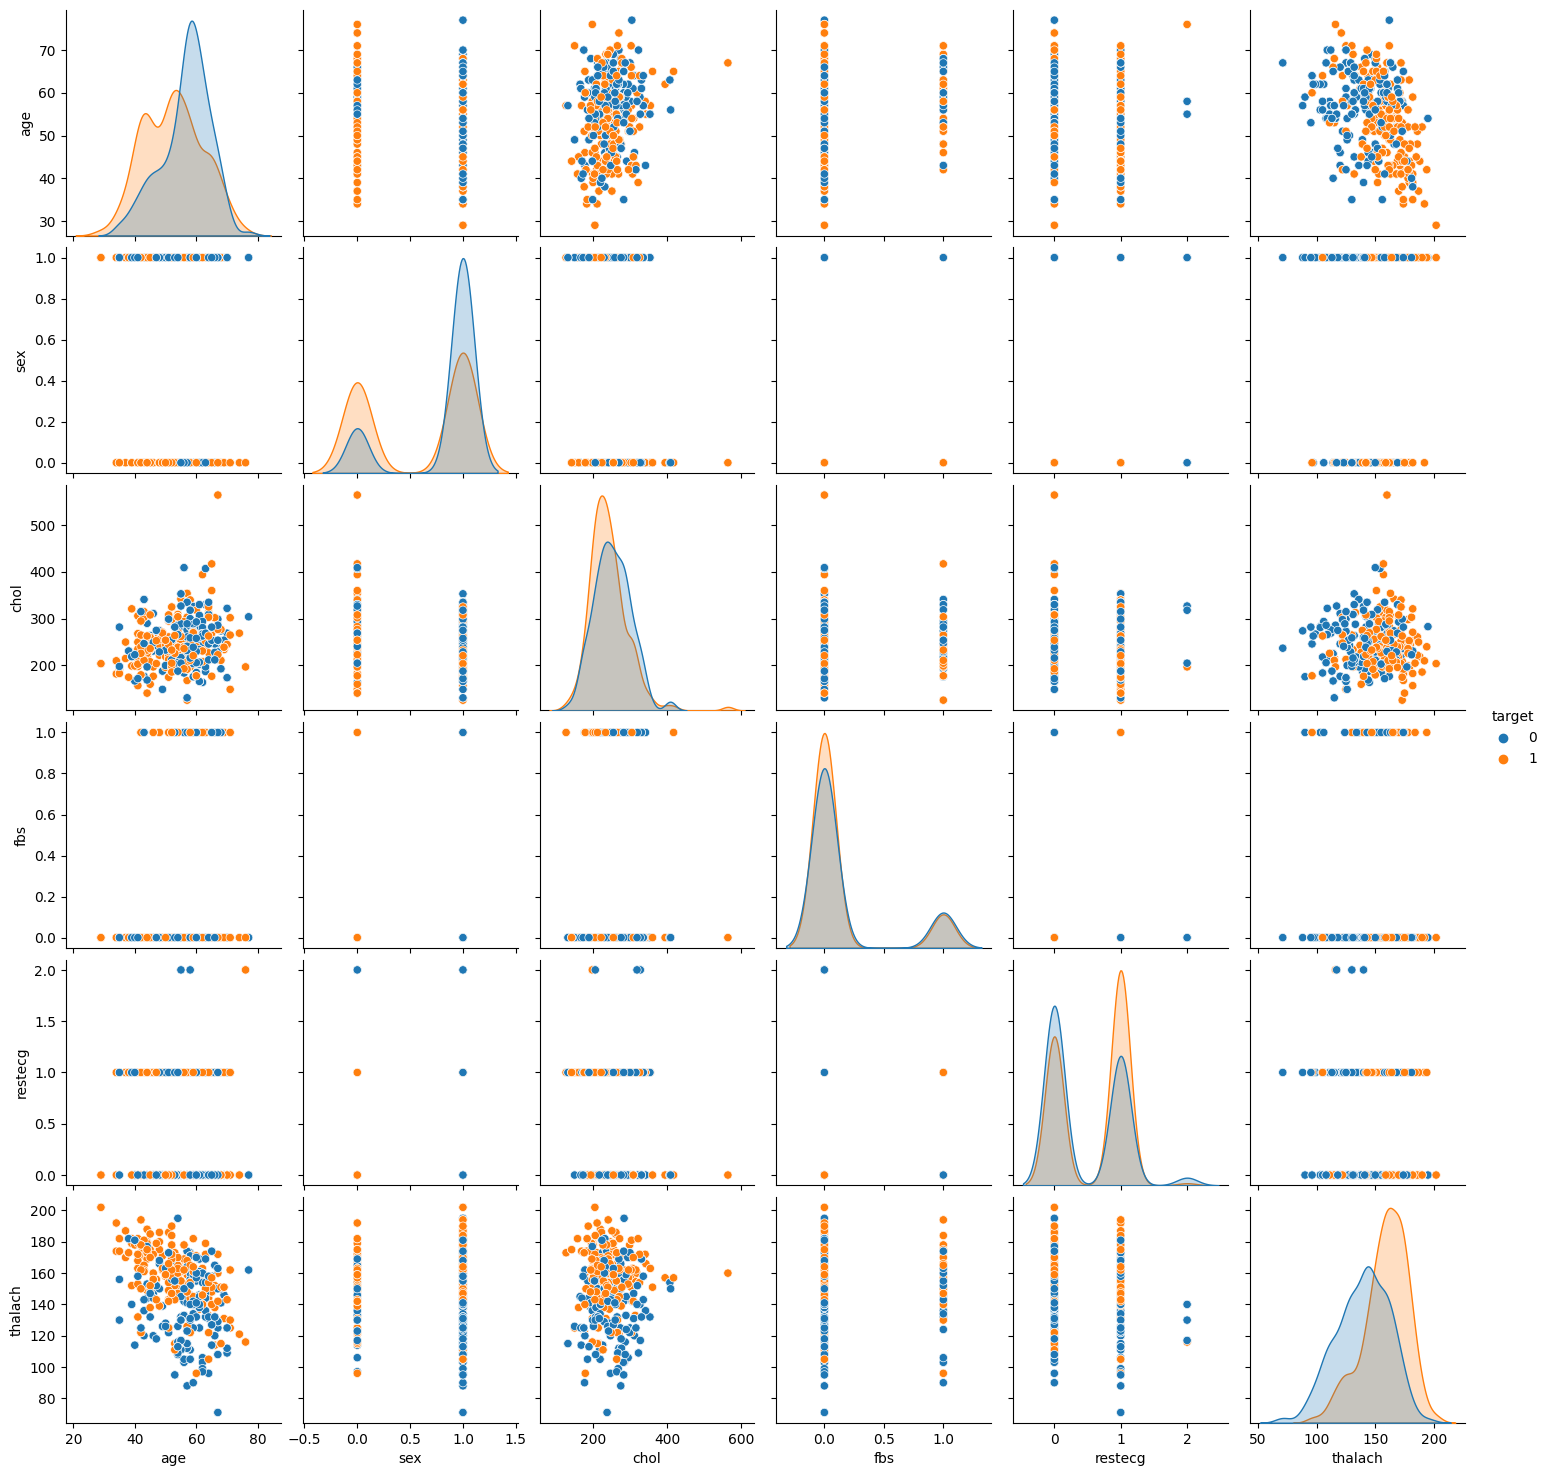

In [ ]:
sns.pairplot(dileep,hue='target')

In [ ]:
dileep


,age,sex,chol,fbs,restecg,thalach,target
0,52,1,212,0,1,168,0
1,53,1,203,1,0,155,0
2,70,1,174,0,1,125,0
3,61,1,203,0,1,161,0
4,62,0,294,1,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,221,0,1,164,1
1021,60,1,258,0,0,141,0
1022,47,1,275,0,0,118,0
1023,50,0,254,0,0,159,1


In [ ]:
numeric_columns=['fbs','chol','thalach','age']

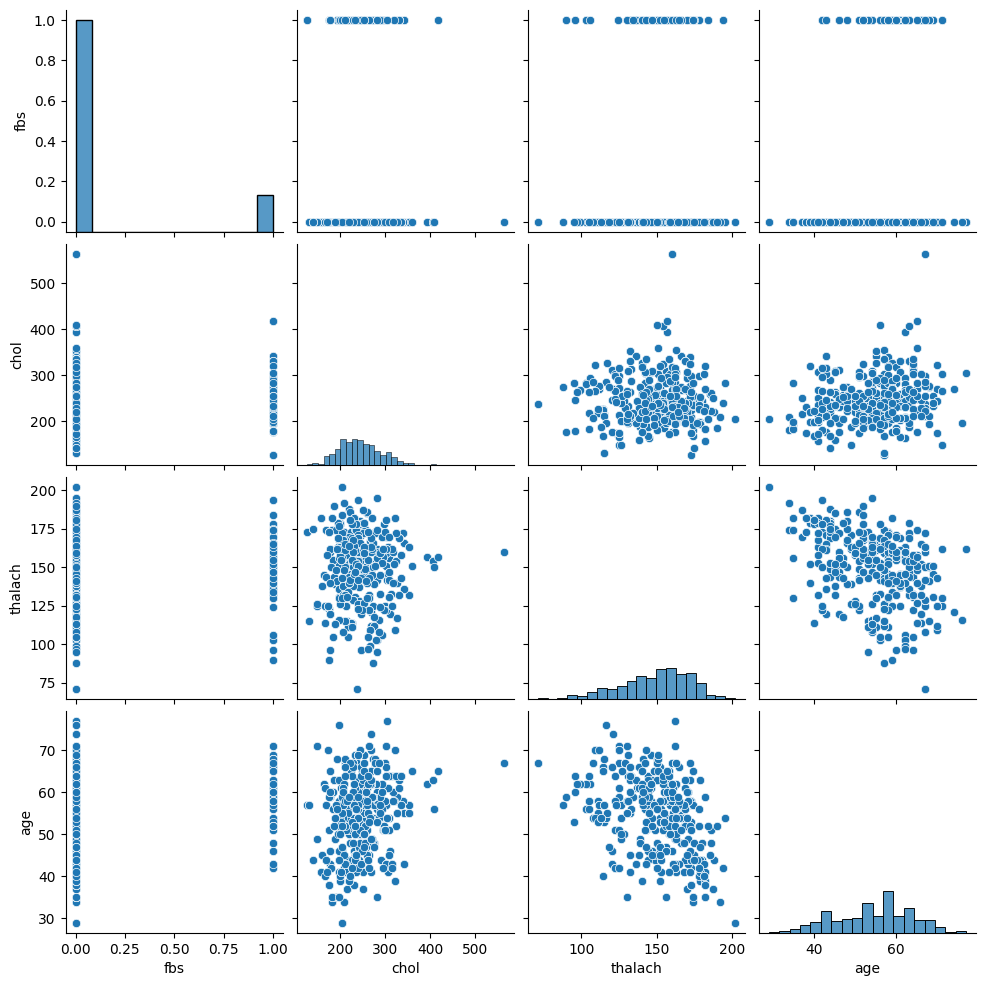

In [ ]:
sns.pairplot(dileep[numeric_columns])

In [ ]:
dileep['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

1    526
0    499
Name: target, dtype: int64


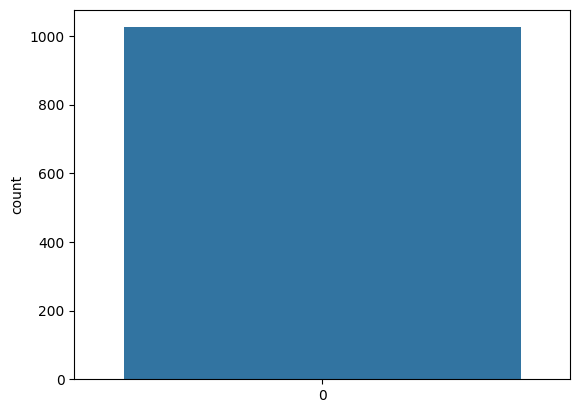

In [ ]:
y = dileep["target"]

sns.countplot(y)

target_temp = dileep.target.value_counts()

print(target_temp)

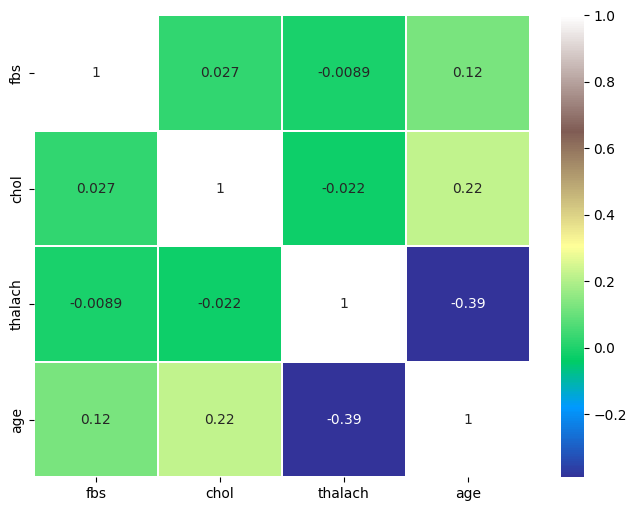

In [ ]:
# create a correlation heatmap
sns.heatmap(dileep[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<ipython-input-34-d53196c086c7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-d53196c086c7>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-d53196c086c7>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

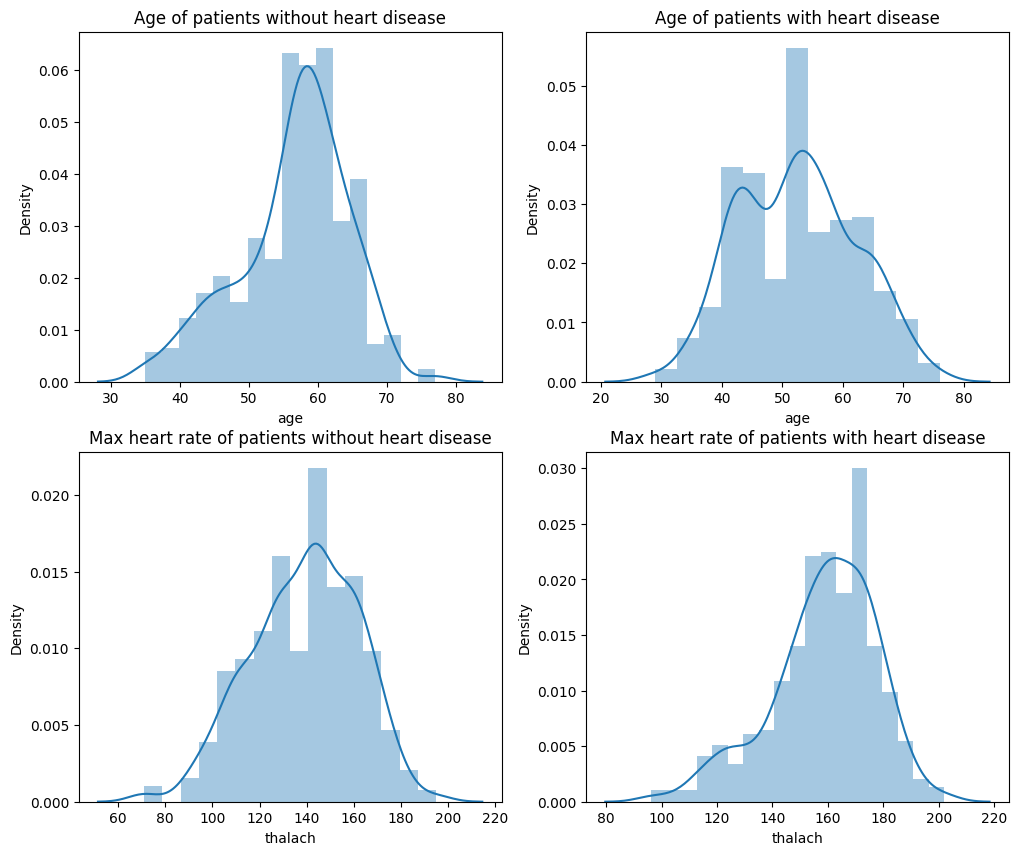

In [ ]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(dileep[dileep['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(dileep[dileep['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(dileep[dileep['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(dileep[dileep['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



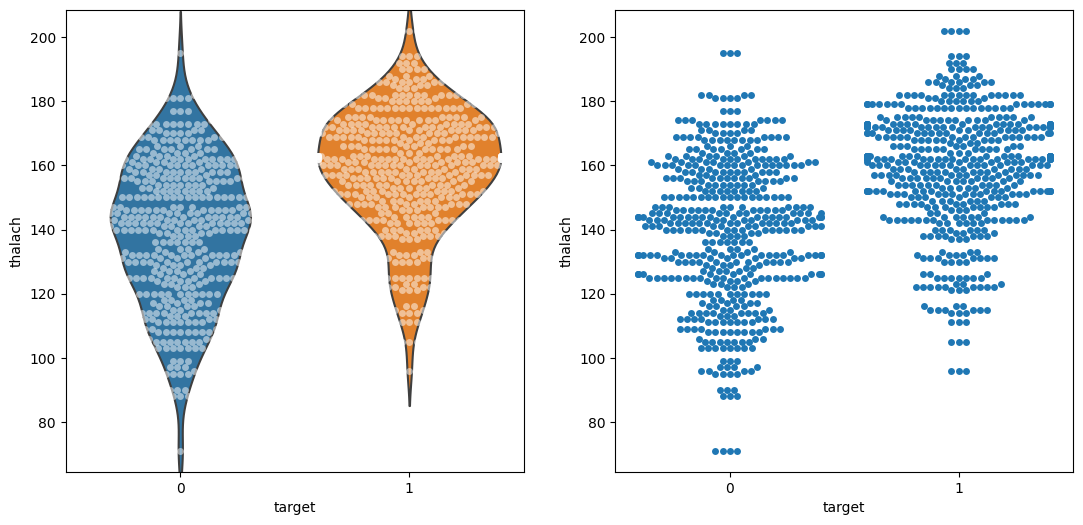

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=dileep, inner=None)
sns.swarmplot(x="target", y="thalach", data=dileep, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=dileep)
plt.show()

In [ ]:
dileep

,age,sex,chol,fbs,restecg,thalach,target
0,52,1,212,0,1,168,0
1,53,1,203,1,0,155,0
2,70,1,174,0,1,125,0
3,61,1,203,0,1,161,0
4,62,0,294,1,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,221,0,1,164,1
1021,60,1,258,0,0,141,0
1022,47,1,275,0,0,118,0
1023,50,0,254,0,0,159,1


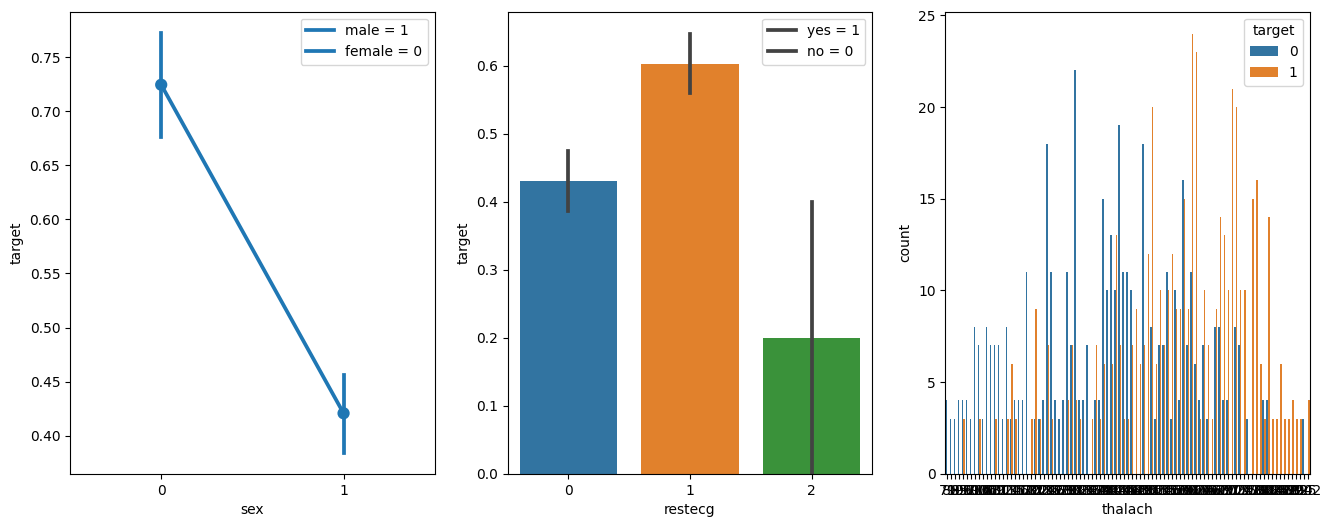

In [ ]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", data=dileep)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="restecg", y="target", data=dileep)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="thalach", hue='target', data=dileep)
plt.show()

In [ ]:
dileep['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
dileep['target'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1020    False
1021    False
1022    False
1023    False
1024    False
Name: target, Length: 1025, dtype: bool

In [ ]:
dileep['target'].sum()

526

In [ ]:
dileep['target'].unique()

array([0, 1])

In [ ]:
dileep.isnull().sum()

age        0
sex        0
chol       0
fbs        0
restecg    0
thalach    0
target     0
dtype: int64

In [ ]:
X,y=dileep,dileep.target

In [ ]:
X.drop('target',axis=1,inplace=True)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
####Or X, y = heart.iloc[:, :-1], heart.iloc[:, -1]

In [ ]:
X.shape

(1025, 6)

In [ ]:
y.shape

(1025,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [ ]:
X_test

array([[ 0.28296121,  0.66150409,  0.54297937, -0.41887792,  0.89125488,
        -2.6577725 ],
       [ 1.05491812,  0.66150409, -0.67872421, -0.41887792, -1.00404855,
        -0.22240739],
       [ 1.71659547,  0.66150409,  1.47380114, -0.41887792, -1.00404855,
        -1.74451058],
       ...,
       [ 1.27547724,  0.66150409, -0.34905816, -0.41887792, -1.00404855,
        -0.48333936],
       [-0.04787747,  0.66150409,  0.23270544, -0.41887792, -1.00404855,
        -0.0919414 ],
       [ 1.38575679,  0.66150409,  0.15513696,  2.38733039,  0.89125488,
         0.60387721]])

In [ ]:
y_test

620    0
181    1
546    0
618    1
822    0
      ..
964    1
242    1
757    1
157    1
999    0
Name: target, Length: 308, dtype: int64

In [ ]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (717, 6)
train_set_y shape: (717,)
test_set_x shape: (308, 6)
test_set_y shape: (308,)


In [ ]:
# Model

In [ ]:
# Decision Tree Classifier
scores_dict = {}

In [ ]:
Catagory=['No','Yes you have Heart Disease']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

95.12987012987013


In [ ]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


In [ ]:
prediction

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
X_DT=np.array([[63,1,140,212,1,168]])
X_DT_prediction=dt.predict(X_DT)

In [ ]:
X_DT_prediction[0]

0

In [ ]:
Catagory[int(X_DT_prediction[0])]

'No'

In [ ]:
#Feature Importance in Decision Trees

In [ ]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.29887042 0.08832359 0.24053996 0.01400874 0.00706001 0.35119729]


In [ ]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

95.12987012987013


In [ ]:
#Models
import pickle
pickle.dump(dt,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))

In [ ]:
######Accuracy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,prediction)
confusion_matrix

array([[149,   4],
       [ 11, 144]])

In [ ]:
import pickle
import numpy as np
from twilio.rest import Client

path1='/content/drive/MyDrive/sc (2).pkl'
path2='/content/drive/MyDrive/model (2).pkl'
sc = pickle.load(open(path1, 'rb'))
model = pickle.load(open(path2, 'rb'))
print("\n\n")
age = int(input("Enter Age : "))
se = int(input(" Enter Gender (1 or 0): "))
fbs = int(input("Enter fasting glucose level : "))
chol = int(input("Enter Serum Cholesterol : "))
restecg = int(input("Enter resting electrocardiographic results : "))
thalach = int(input("Enter maximum heart rate achieved :"))


# Test Set
new = [age, se,tresbbp, chol, restecg,
       thalach]
'''# Another Sets
x = [52, 1, 0, 125, 212, 0, 1, 168,	0, 1.0, 2,	2, 3]
inputs = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]'''

input = np.array([new])
input = sc.transform(input)
output = model.predict(input)
if(int(output == 0)):
    print("\n------Normal State ")
else:
    print("\n-------Abnormal")

accoun_sid='ACfc86854138e118fdf81366f3faec8c39'
auth_token='cb2c3a37204f3a03db1336c0d4c40cc1'
client=Client(accoun_sid,auth_token)
if(int(output ==0)):
  message=client.messages.create(body=("----Normal State",output),from_='+15855802827', to='+918688747438')
else:
  message=client.messages.create(body=("Abnormal",output),from_='+15855802827', to='+918688747438')




ModuleNotFoundError: ignored

In [ ]:
from google.colab import files
files.download('sc.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install twilio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 25.0 MB/s eta 0:00:00


FileNotFoundError: ignored